In [1]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=ddc4b3de1dba23ca9b125964be74277b93d23e9df4493693c32ce223508159b0
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [2]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving 500s90f6t2g0.01py1e2-y2e2-y3e2.csv to 500s90f6t2g0.01py1e2-y2e2-y3e2.csv


In [3]:
df = pd.read_csv("500s90f6t2g0.01py1e2-y2e2-y3e2.csv")
df.head()
y_col = [
    'Y1',
    'Y2',
    'Y3',
    'Y4',
    'Y5',
    'Y6'
 ]
y = df[y_col]
y.head()
X = df[df.columns.drop(y)]
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
0,0.238026,0.219612,0.354688,0.395502,0.277970,0.146302,0.167527,0.246007,0.039510,0.569521,...,0.835197,0.524349,0.772704,0.976412,0.208017,0.321315,0.415466,0.461313,0.095224,0.457697
1,0.685304,0.627145,0.335177,0.230508,0.054420,0.812056,1.000000,0.724812,0.886083,0.105000,...,0.976535,0.671485,0.626995,0.956609,0.297915,0.578146,0.728683,0.704714,0.285243,0.015787
2,0.246317,0.785416,0.045029,0.443212,0.265194,0.395741,0.648404,0.802475,0.480259,0.325513,...,0.880623,0.176660,0.505592,0.001415,0.015529,0.162979,0.056710,0.910543,0.821921,0.468227
3,0.209168,0.740108,0.901437,0.771368,0.990409,0.749574,0.368617,0.623414,0.136474,0.881175,...,0.458783,0.688068,0.875342,0.543098,0.241321,0.965132,0.690813,0.289916,0.073303,0.544403
4,0.374566,0.777228,0.196754,0.954048,0.535260,0.159840,0.774730,0.546953,0.706469,0.559437,...,0.074457,0.938235,0.126401,0.712533,0.994475,0.166478,0.845960,0.349573,0.496287,0.637630


In [4]:
y.head()

,Y1,Y2,Y3,Y4,Y5,Y6
0,0.559523,0.398865,0.632149,0.015771,0.062481,0.069448
1,0.512882,0.544880,0.561129,0.001089,0.000606,0.014781
2,0.506309,0.508202,0.490939,0.000398,0.001968,0.000350
3,0.495580,0.527833,0.671085,0.000002,0.000055,0.116524
4,0.489159,0.542954,0.533608,0.000199,0.000440,0.004431


In [6]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( 
                        X, y, test_size = 0.20, random_state = 39)
from sklearn.multioutput import MultiOutputRegressor
rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)

0.10427762110661253

In [7]:
import math
from sklearn.metrics import  mean_squared_error as morrfr_rmse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_rmse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)

morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)

RMSE for morrfr is 0.1646761740496957
MAE for morrfr is 0.11321035166006643


In [8]:
#Running TPOT-MOR using MultiOutputRegressor from SK-Learn
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
tpotreg = MultiOutputRegressor(TPOTRegressor(warm_start=True ,generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10))
tpotreg.fit(X_train,y_train)
tpotreg.score(X_test, y_test)


import math
from sklearn.metrics import  mean_squared_error as tpotmo_mse
from sklearn.metrics import mean_absolute_error as tpotmo_mae
tpotmo_rmse1=math.sqrt(tpotmo_mse(y_test, y_pred))
print('RMSE for TPOT-MO is',tpotmo_rmse1)

tpotmo_mae1=tpotmo_mae(y_test, y_pred)
print('MAE for TPOT-MO is',tpotmo_mae1)
tpotreg.score(X_test, y_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.010678028892451428

Generation 2 - Current best internal CV score: -0.010669385509758442

Generation 3 - Current best internal CV score: -0.01065483623464884

Generation 4 - Current best internal CV score: -0.010654836234648838

Generation 5 - Current best internal CV score: -0.010654836234648838

Best pipeline: LassoLarsCV(LassoLarsCV(input_matrix, normalize=True), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.011576349452356006

Generation 2 - Current best internal CV score: -0.01150969438024493

Generation 3 - Current best internal CV score: -0.01150969438024493

Generation 4 - Current best internal CV score: -0.01150969438024493

Generation 5 - Current best internal CV score: -0.01150969438024493

Best pipeline: LassoLarsCV(SelectPercentile(input_matrix, percentile=65), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.013996225009877492

Generation 2 - Current best internal CV score: -0.013996225009877492

Generation 3 - Current best internal CV score: -0.01399216379435655

Generation 4 - Current best internal CV score: -0.013979048215063372

Generation 5 - Current best internal CV score: -0.013979048215063372

Best pipeline: ElasticNetCV(StandardScaler(LassoLarsCV(input_matrix, normalize=True)), l1_ratio=0.2, tol=0.01)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.02777472805081322

Generation 2 - Current best internal CV score: -0.02777472805081322

Generation 3 - Current best internal CV score: -0.02777472805081322

Generation 4 - Current best internal CV score: -0.027182575198240806

Generation 5 - Current best internal CV score: -0.027182575198240806

Best pipeline: LassoLarsCV(OneHotEncoder(DecisionTreeRegressor(input_matrix, max_depth=6, min_samples_leaf=19, min_samples_split=2), minimum_fraction=0.15, sparse=False, threshold=10), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.01568724773510383

Generation 2 - Current best internal CV score: -0.01568724773510383

Generation 3 - Current best internal CV score: -0.01568724773510383

Generation 4 - Current best internal CV score: -0.01568724773510383

Generation 5 - Current best internal CV score: -0.01567274375829166

Best pipeline: AdaBoostRegressor(DecisionTreeRegressor(ElasticNetCV(input_matrix, l1_ratio=0.15000000000000002, tol=1e-05), max_depth=2, min_samples_leaf=18, min_samples_split=4), learning_rate=0.01, loss=square, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.02272199724187255

Generation 2 - Current best internal CV score: -0.02272199724187255

Generation 3 - Current best internal CV score: -0.02272199724187255

Generation 4 - Current best internal CV score: -0.02272199724187255

Generation 5 - Current best internal CV score: -0.02262233586088727

Best pipeline: RandomForestRegressor(CombineDFs(input_matrix, input_matrix), bootstrap=True, max_features=0.35000000000000003, min_samples_leaf=18, min_samples_split=7, n_estimators=100)
RMSE for TPOT-MO is 0.1646761740496957
MAE for TPOT-MO is 0.11321035166006643


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsC

0.2375267493350561

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
rfg1 = MultiOutputRegressor(LinearSVR(random_state=39,dual = True,max_iter=1000000))
rfg1.fit(X_train, y_train)
y_pred1 = rfg1.predict(X_test)
rfg1.score(X_test, y_test)

0.08533867322821005

In [ ]:
import math
from sklearn.metrics import mean_absolute_error as morlsvr_mae2
from sklearn.metrics import mean_squared_error as morlsvr_rmse2
morlsvr_rmse1=math.sqrt(morlsvr_rmse2(y_test, y_pred1))
print('RMSE for morlsvr is',morlsvr_rmse1)
morlsvr_mae1=morlsvr_mae2(y_test, y_pred1)
print('MAE for morlsvr is',morlsvr_mae1)

RMSE for morlsvr is 0.1672396453824405
MAE for morlsvr is 0.10194075729823131


In [ ]:
class MultiOutputTP(object):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, y):
        X, y = map(np.atleast_2d, (X, y))
        assert X.shape[0] == y.shape[0]
        Ny = y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            clf = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10)
            Xi = np.hstack([X, y[:, :i]])
            yi = y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            y[:, i] = clf.predict(np.hstack([X, y[:, :i]]))
        return y

In [ ]:
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
clf2 = MultiOutputTP(50).fit(X_train, y_train)
Ypred2 = clf2.predict(X_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.010733723358187515

Generation 2 - Current best internal CV score: -0.010733723358187515

Generation 3 - Current best internal CV score: -0.010733723358187515

Generation 4 - Current best internal CV score: -0.010694142195827988

Generation 5 - Current best internal CV score: -0.010669385509758446

Best pipeline: LassoLarsCV(LassoLarsCV(StandardScaler(OneHotEncoder(input_matrix, minimum_fraction=0.05, sparse=False, threshold=10)), normalize=False), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.011573879216320523

Generation 2 - Current best internal CV score: -0.011573879216320523

Generation 3 - Current best internal CV score: -0.011548781866432045

Generation 4 - Current best internal CV score: -0.011485860731062019

Generation 5 - Current best internal CV score: -0.011485860731062019

Best pipeline: ElasticNetCV(StandardScaler(LassoLarsCV(input_matrix, normalize=True)), l1_ratio=0.8500000000000001, tol=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.014011219713861555

Generation 2 - Current best internal CV score: -0.013501650980377955

Generation 3 - Current best internal CV score: -0.013501650980377955

Generation 4 - Current best internal CV score: -0.012561837835552772

Generation 5 - Current best internal CV score: -0.012561837835552772

Best pipeline: RandomForestRegressor(RandomForestRegressor(LassoLarsCV(input_matrix, normalize=True), bootstrap=True, max_features=0.8, min_samples_leaf=5, min_samples_split=12, n_estimators=100), bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=4, min_samples_split=3, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.001133760329002163

Generation 2 - Current best internal CV score: -0.0009711098739509502

Generation 3 - Current best internal CV score: -0.0009711098739509502

Generation 4 - Current best internal CV score: -0.0009610474213776982

Generation 5 - Current best internal CV score: -0.0009388131264738755

Best pipeline: ExtraTreesRegressor(AdaBoostRegressor(input_matrix, learning_rate=0.001, loss=exponential, n_estimators=100), bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0005316963058097233

Generation 2 - Current best internal CV score: -0.0005316963058097233

Generation 3 - Current best internal CV score: -6.285712113530195e-25

Generation 4 - Current best internal CV score: -6.285712113530195e-25

Generation 5 - Current best internal CV score: -5.795435565747455e-26

Best pipeline: LassoLarsCV(StandardScaler(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False)), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.001586567228175385

Generation 2 - Current best internal CV score: -0.001586567228175385

Generation 3 - Current best internal CV score: -0.0009299606751923206

Generation 4 - Current best internal CV score: -0.0009299606751923206

Generation 5 - Current best internal CV score: -0.0009299606751923206

Best pipeline: ElasticNetCV(XGBRegressor(XGBRegressor(input_matrix, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.55, verbosity=0), learning_rate=0.001, max_depth=5, min_child_weight=8, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.1, verbosity=0), l1_ratio=0.5, tol=0.1)


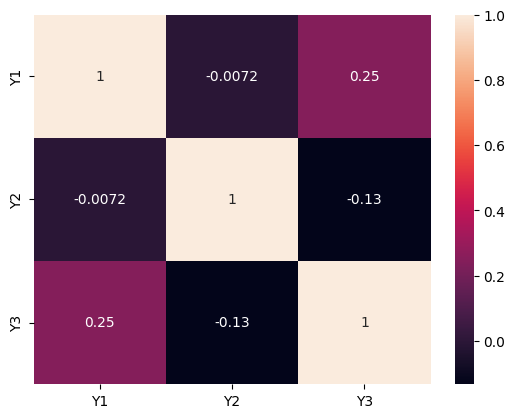

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = y_test.iloc[:,:3]
correlation_mat = df_small.corr(method='pearson')
sns.heatmap(correlation_mat, annot = True)
plt.show()

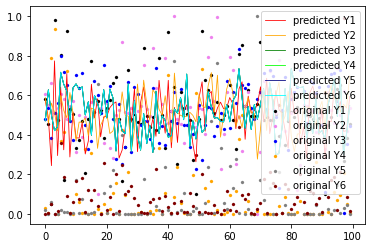

In [ ]:
X_ax = range(len(X_test))
#plt.scatter(y_test[:, 0],y_test[:, 1],y_test[:, 2], s=5, color="blue", label="original")
plt.scatter(X_ax, y_test.iloc[:,0], color="black", s=10,linewidth=0.1,label="original Y1")
plt.scatter(X_ax, y_test.iloc[:,1], color="violet", s=10,linewidth=0.1,label="original Y2")
plt.scatter(X_ax, y_test.iloc[:,2], color="blue", s=10,linewidth=0.1,label="original Y3")
plt.scatter(X_ax, y_test.iloc[:,3], color="orange", s=10,linewidth=0.1,label="original Y4")
plt.scatter(X_ax, y_test.iloc[:,4], color="gray", s=10,linewidth=0.1,label="original Y5")
plt.scatter(X_ax, y_test.iloc[:,5], color="maroon", s=10,linewidth=0.1,label="original Y6")


plt.plot(X_ax, Ypred2[:,0], lw=0.8, color="red", label="predicted Y1")
plt.plot(X_ax, Ypred2[:,1], lw=0.8, color="orange", label="predicted Y2")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="green", label="predicted Y3")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="lime", label="predicted Y4")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="navy", label="predicted Y5")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="aqua", label="predicted Y6")
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(((Ypred2 - y_test) ** 2).mean())
#rmse = sqrt(mean_squared_error(y_test, Ypred2))
#rmse
print("rmse: ",rmse)

from statistics import mean
arrmse = mean(rmse)
print("arrmse: ",arrmse)
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, Ypred2)
print("Mean absolute error : ",mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print("R2: ",r2)
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, Ypred2))
#RMSE2 = sqrt(mean_squared_error(Ytest, Ypred2))

print('RMSE for Ypred2 is',RMSE)
#print('RMSE for Ypred2 is',RMSE2)

rmse:  Y1    0.118134
Y2    0.112752
Y3    0.114237
Y4    0.189800
Y5    0.172270
Y6    0.135462
dtype: float64
arrmse:  0.14044235820456513
Mean absolute error :  0.09066555814784454
R2:  0.32082928194747806
RMSE for Ypred2 is 0.14362536852008995
